# Introduction and initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data_description.csv')

In [3]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 37 columns]

dropping the first column as it is not related anyway

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

get the data types and check the span of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

dropping the pcircle column as it has only one value

In [ ]:
df['pcircle'].unique()

In [7]:
#as pcircle has only one value we can drop it
#a phone number too wont affect the user defaulting
df.drop(['pcircle','pdate','msisdn'],axis=1,inplace=True)

In [8]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

1. check the correlation and get the correlation with the target

In [9]:
ds_corr=df.corr()
ds_corr['label']

label                   1.000000
aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt

In [10]:
#we drop the negatively least correlated columns from the original dataset
df.drop(['aon','medianmarechprebal30','fr_da_rech30','fr_da_rech90'],axis=1,inplace=True)

dropping the below columns as they are highly correlated with similar other columns

In [11]:
df.drop(['fr_ma_rech30','fr_ma_rech90'],axis=1,inplace=True)

In [12]:
df.shape

(209593, 27)

# visualization and description

visualizing the correlation

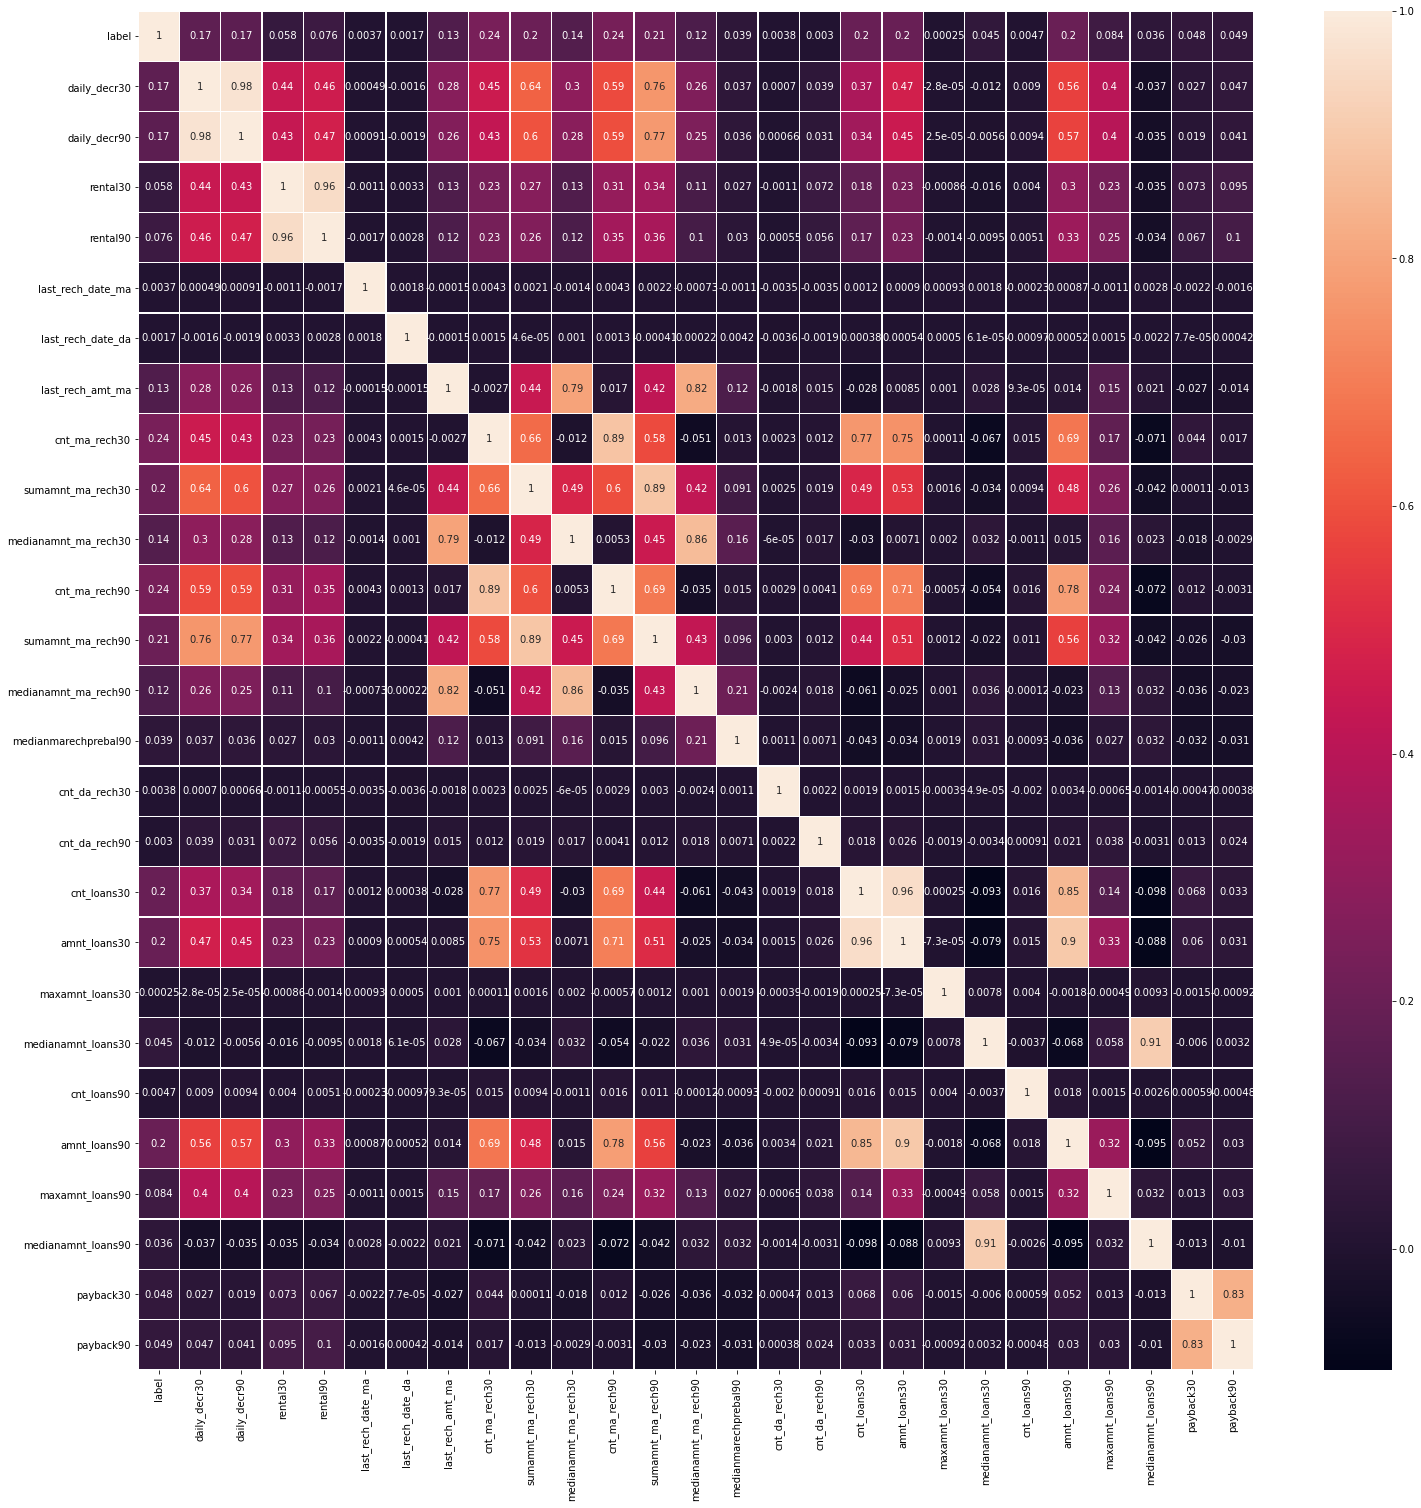

In [13]:
fig, ax=plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(),color='k',annot=True,linewidths=.5, ax=ax)

check all the unique values from each columns

In [14]:
for i in df.columns:
    print(i)
    print("\033[1m"+i+"\033[0m",df[i].unique())
    print('----------------')

label
label [0 1]
----------------
daily_decr30
daily_decr30 [ 3055.05    12122.       1398.      ... 11843.11167 12488.22833
  4489.362  ]
----------------
daily_decr90
daily_decr90 [ 3065.15      12124.75       1398.        ...   151.8723333 12574.37
  4534.82     ]
----------------
rental30
rental30 [ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]
----------------
rental90
rental90 [ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]
----------------
last_rech_date_ma
last_rech_date_ma [2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]
----------------
last_rech_date_da
last_rech_date_da [0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]
----------------
last_rech_amt_ma
last_rech_amt_ma [ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  1933 17391 11927  

cnt_loans90 [2.00000000e+00 1.00000000e+00 7.00000000e+00 ... 3.02706822e+03
 4.47977118e+03 2.04790245e+03]
----------------
amnt_loans90
amnt_loans90 [ 12   6  42  18  24  30  48 108  36  60  78  54  72   0 204 162  84 132
  66  90 102 300 138 168  96 114 156 120 126 144 180 198 174 216 192 276
 150 234 228 312 222 384 186 240 252 408 288 210 306 354 258 270 396 246
 342 264 378 426 294 438 330 318 360 324 348 372 282 402 336]
----------------
maxamnt_loans90
maxamnt_loans90 [ 6 12  0]
----------------
medianamnt_loans90
medianamnt_loans90 [0.  1.  0.5 2.  1.5 3. ]
----------------
payback30
payback30 [29.          0.          2.33333333 ... 56.75       64.33333333
  5.61538461]
----------------
payback90
payback90 [29.          0.          2.33333333 ... 64.33333333  5.23529412
 25.84615385]
----------------


In [15]:
df.head()

label  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0      0   3055.050000   3065.150000    220.13    260.13                2.0   
1      1  12122.000000  12124.750000   3691.26   3691.26               20.0   
2      1   1398.000000   1398.000000    900.13    900.13                3.0   
3      1     21.228000     21.228000    159.42    159.42               41.0   
4      1    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  ...  \
0                0.0              1539              2             3078.0  ...   
1                0.0              5787              1             5787.0  ...   
2                0.0              1539              1             1539.0  ...   
3                0.0               947              0                0.0  ...   
4                0.0              2309              7            20029.0  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 27 columns]

dropping duplicated columns as they do not add any value to the target

In [16]:
df.duplicated().sum()

3327

In [17]:
df=df.drop_duplicates()

In [18]:
df.shape

(206266, 27)

visualizing data in each column

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


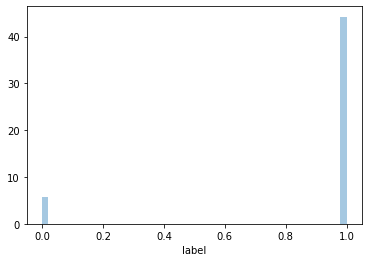

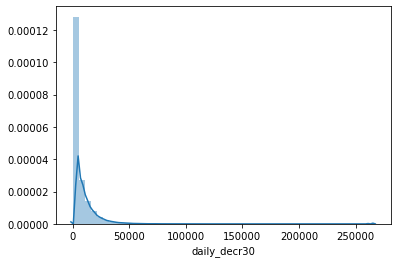

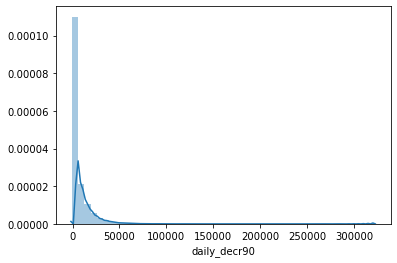

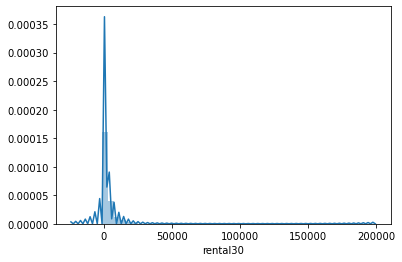

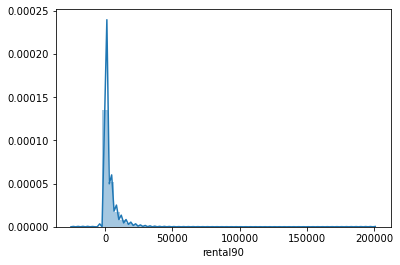

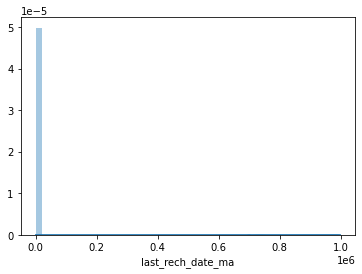

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


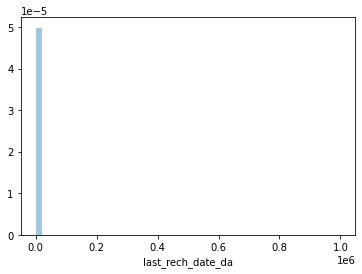

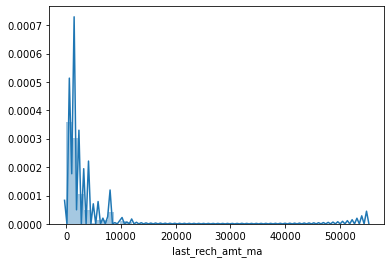

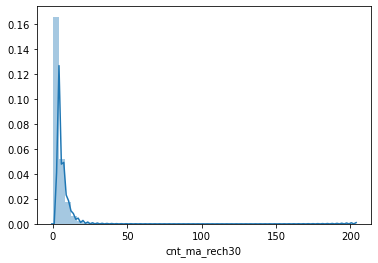

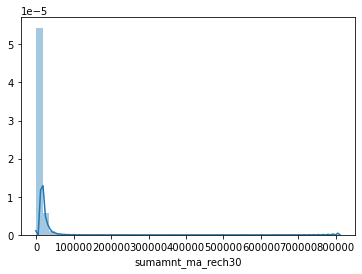

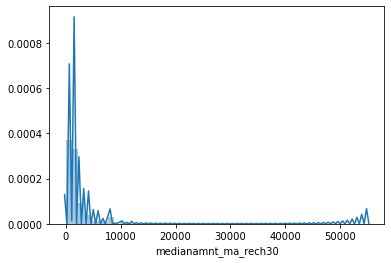

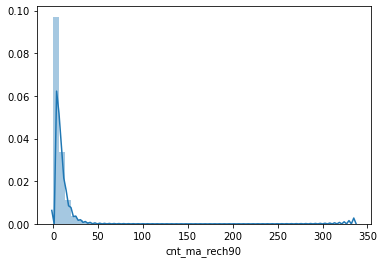

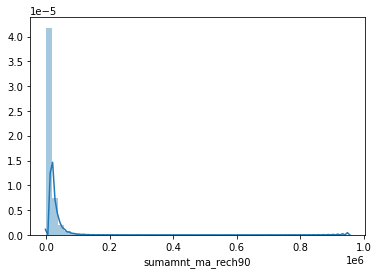

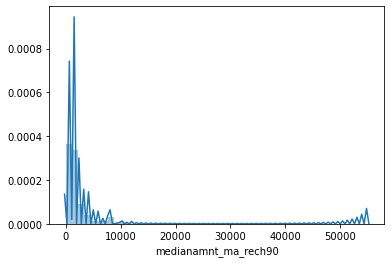

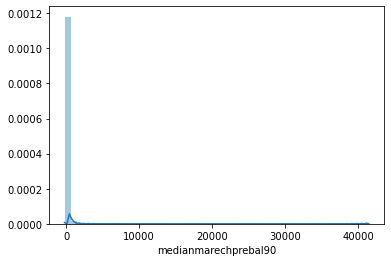

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


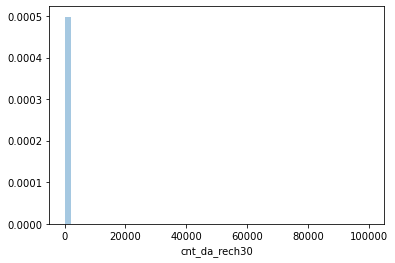

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


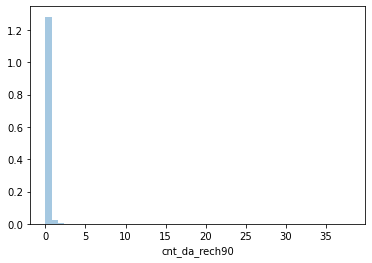

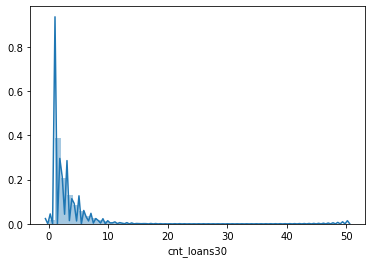

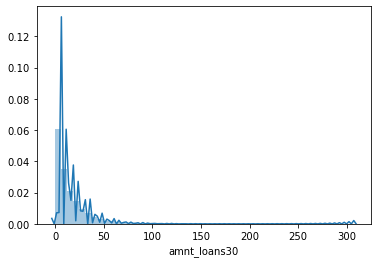

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


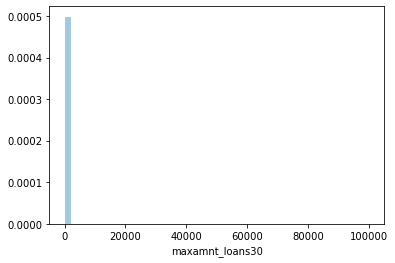

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


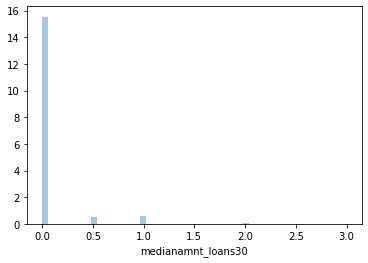

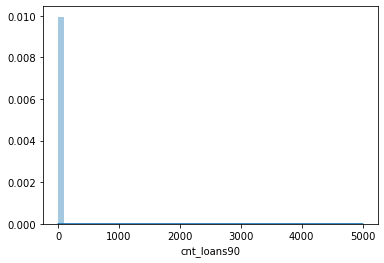

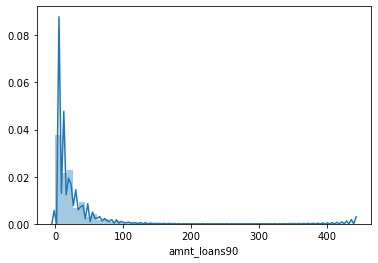

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


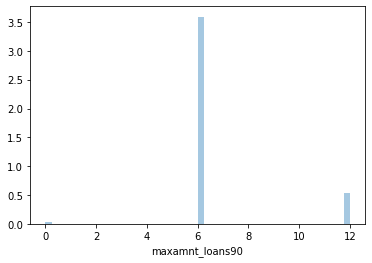

F:\work\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


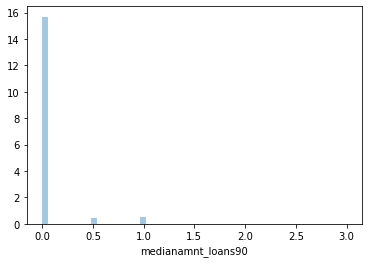

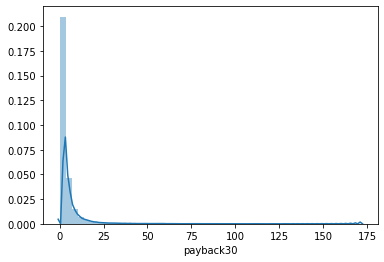

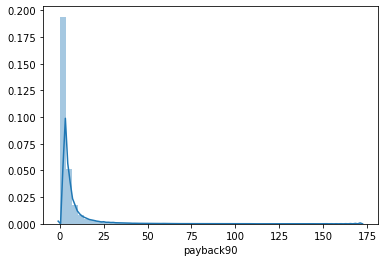

In [19]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

#from the firts plot we can see that the target is highly imbalanced, we must employ randomization to deal with this.
#all the columns are heavily skewed as well

In [21]:
df.describe()

label   daily_decr30   daily_decr90       rental30  \
count  206266.000000  206266.000000  206266.000000  206266.000000   
mean        0.884518    5463.316717    6175.738198    2734.776084   
std         0.319603    9271.707303   10981.439188    4330.123594   
min         0.000000     -93.012667     -93.012667  -23737.140000   
25%         1.000000      44.719000      44.946500     299.700000   
50%         1.000000    1552.373333    1594.540000    1119.100000   
75%         1.000000    7381.779500    7972.815000    3417.687500   
max         1.000000  265926.000000  320630.000000  198926.110000   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
count  206266.000000      206266.000000      206266.000000     206266.000000   
mean     3538.342326        3816.427967        3772.079484       2097.721840   
std      5800.331408       54336.769630       53801.473496       2375.190313   
min    -24720.580000         -29.000000         -29.000000          0.000000   
25%       330.300000           1.000000           0.000000        770.000000   
50%      1384.325000           3.000000           0.000000       1539.000000   
75%      4271.970000           7.000000           0.000000       2309.000000   
max    200148.110000      998650.377700      999171.809400      55000.000000   

       cnt_ma_rech30  sumamnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count  206266.000000      206266.000000  ...  206266.000000  206266.000000   
mean        4.042174        7828.707717  ...       2.787343      18.141167   
std         4.259971       10173.395959  ...       2.565149      17.454242   
min         0.000000           0.000000  ...       0.000000       0.000000   
25%         1.000000        1546.000000  ...       1.000000       6.000000   
50%         3.000000        4717.000000  ...       2.000000      12.000000   
75%         5.000000       10050.000000  ...       4.000000      24.000000   
max       203.000000      810096.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    206266.000000       206266.000000  206266.000000  206266.000000   
mean        278.988630            0.054612      18.803516      23.926377   
std        4279.227187            0.218877     226.592031      26.588686   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    206266.000000       206266.000000  206266.000000  206266.000000  
mean          6.710985            0.046532       3.453441       4.390982  
std           2.114834            0.201332       8.873445      10.375831  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.750000  
75%           6.000000            0.000000       3.800000       4.571429  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 27 columns]

1. we can see that in most of columns there are outliers considering the difference in 3rd quantile and max, we need to treat that
2. there are no null values in the dataset

In [22]:
df.drop(['amnt_loans30','daily_decr90','rental90'],axis=1,inplace=True)

In [23]:
df.shape

(206266, 24)

In [24]:
#treat outliers using the zscore method
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df = df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(206266, 24)
(167851, 24)


In [25]:
df.describe()

label   daily_decr30       rental30  last_rech_date_ma  \
count  167851.000000  167851.000000  167851.000000      167851.000000   
mean        0.873465    3926.772931    2083.618483           6.037754   
std         0.332452    5835.831737    2853.338302           9.582790   
min         0.000000     -41.755000   -7786.750000         -29.000000   
25%         1.000000      35.869000     261.000000           1.000000   
50%         1.000000    1002.333333     934.600000           3.000000   
75%         1.000000    5840.000000    2717.960000           7.000000   
max         1.000000   33265.188670   15724.000000         113.000000   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
count      167851.000000     167851.000000  167851.000000      167851.000000   
mean            0.808634       1821.314040       3.503762        6119.215793   
std             6.675138       1803.678553       3.073612        6107.548255   
min           -29.000000          0.000000       0.000000           0.000000   
25%             0.000000        770.000000       1.000000        1540.000000   
50%             0.000000       1539.000000       3.000000        4617.000000   
75%             0.000000       1924.000000       5.000000        8568.000000   
max           115.000000       8000.000000      16.000000       38341.000000   

       medianamnt_ma_rech30  cnt_ma_rech90  ...  cnt_da_rech90    cnt_loans30  \
count         167851.000000  167851.000000  ...  167851.000000  167851.000000   
mean            1618.101006       5.395124  ...       0.020149       2.544745   
std             1605.349932       4.966661  ...       0.140510       1.910937   
min                0.000000       0.000000  ...       0.000000       0.000000   
25%              770.000000       2.000000  ...       0.000000       1.000000   
50%             1539.000000       4.000000  ...       0.000000       2.000000   
75%             1547.000000       8.000000  ...       0.000000       3.000000   
max             8000.000000      28.000000  ...       1.000000      10.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    167851.000000       167851.000000  167851.000000  167851.000000   
mean         10.440835            0.016330       3.277925      20.624899   
std         195.045878            0.088873       2.866555      18.224956   
min           0.000000            0.000000       1.000000       6.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       4.000000      30.000000   
max       12991.655120            0.500000      17.000000     102.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    167851.000000       167851.000000  167851.000000  167851.000000  
mean          6.618870            0.012797       2.720557       3.337713  
std           1.824895            0.078961       4.364325       5.103005  
min           6.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.600000  
75%           6.000000            0.000000       4.000000       4.600000  
max          12.000000            0.500000      30.000000      35.500000  

[8 rows x 24 columns]

checking the count of positive and negative values we can see that the target is highly imbalanced

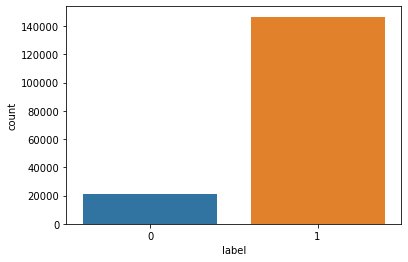

In [26]:
sns.countplot(df['label'])

check the distribution of data according to the target

F:\work\anaconda\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


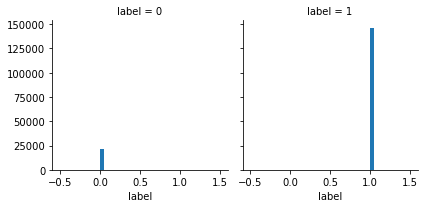

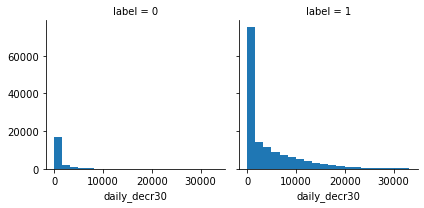

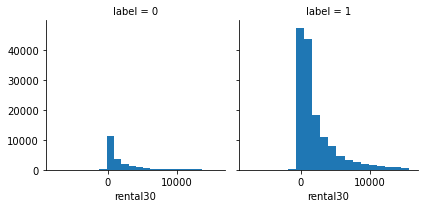

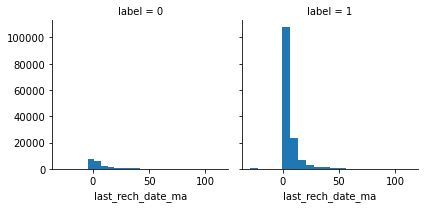

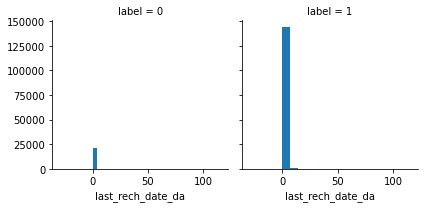

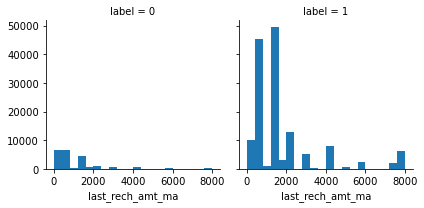

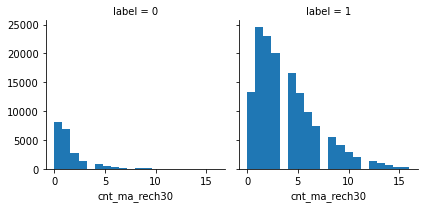

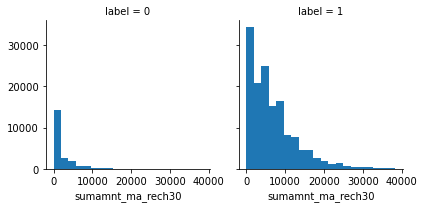

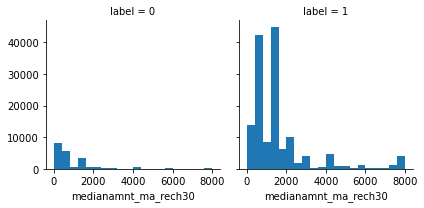

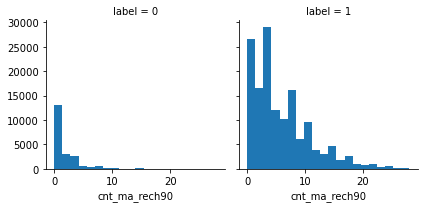

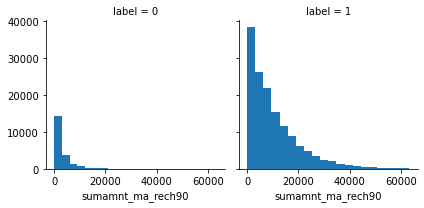

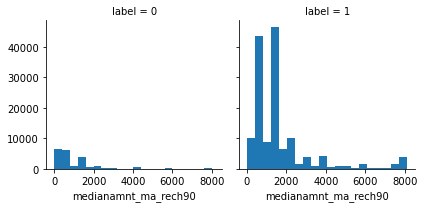

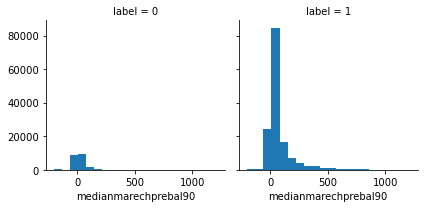

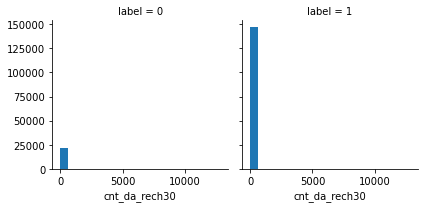

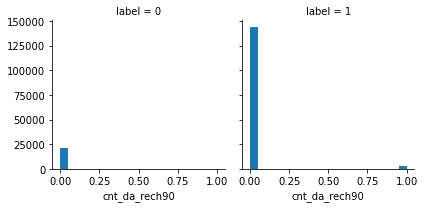

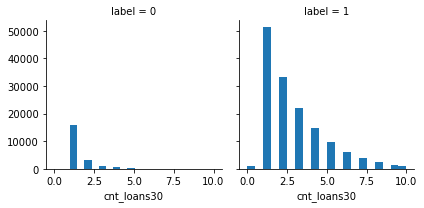

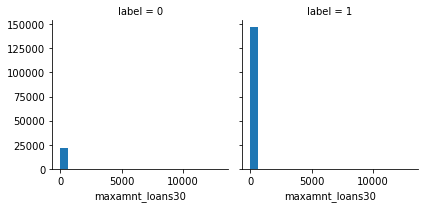

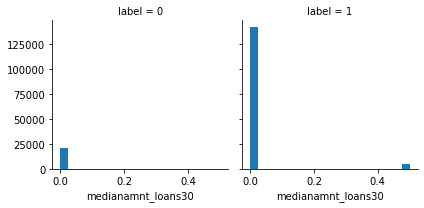

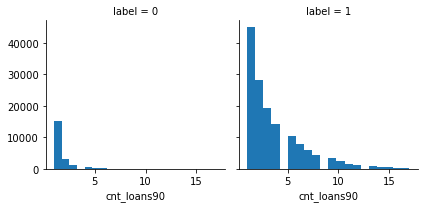

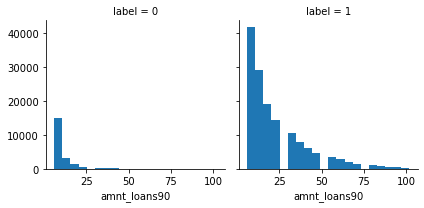

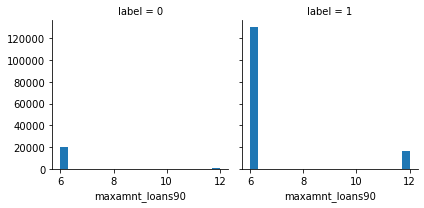

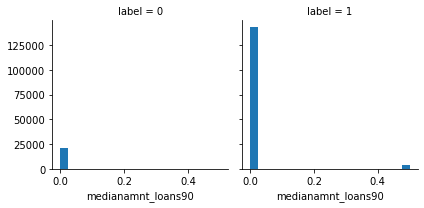

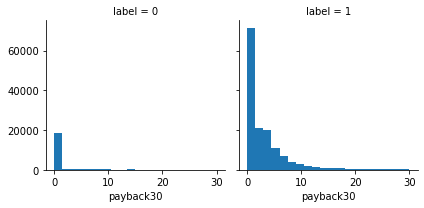

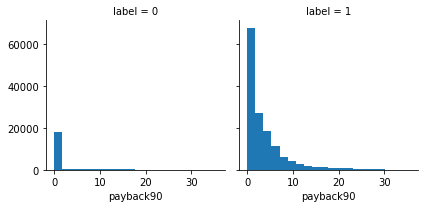

In [27]:
for i in df.columns:
    g = sns.FacetGrid(df, col='label')
    g.map(plt.hist, i, bins=20)

check relation of each column with every other column

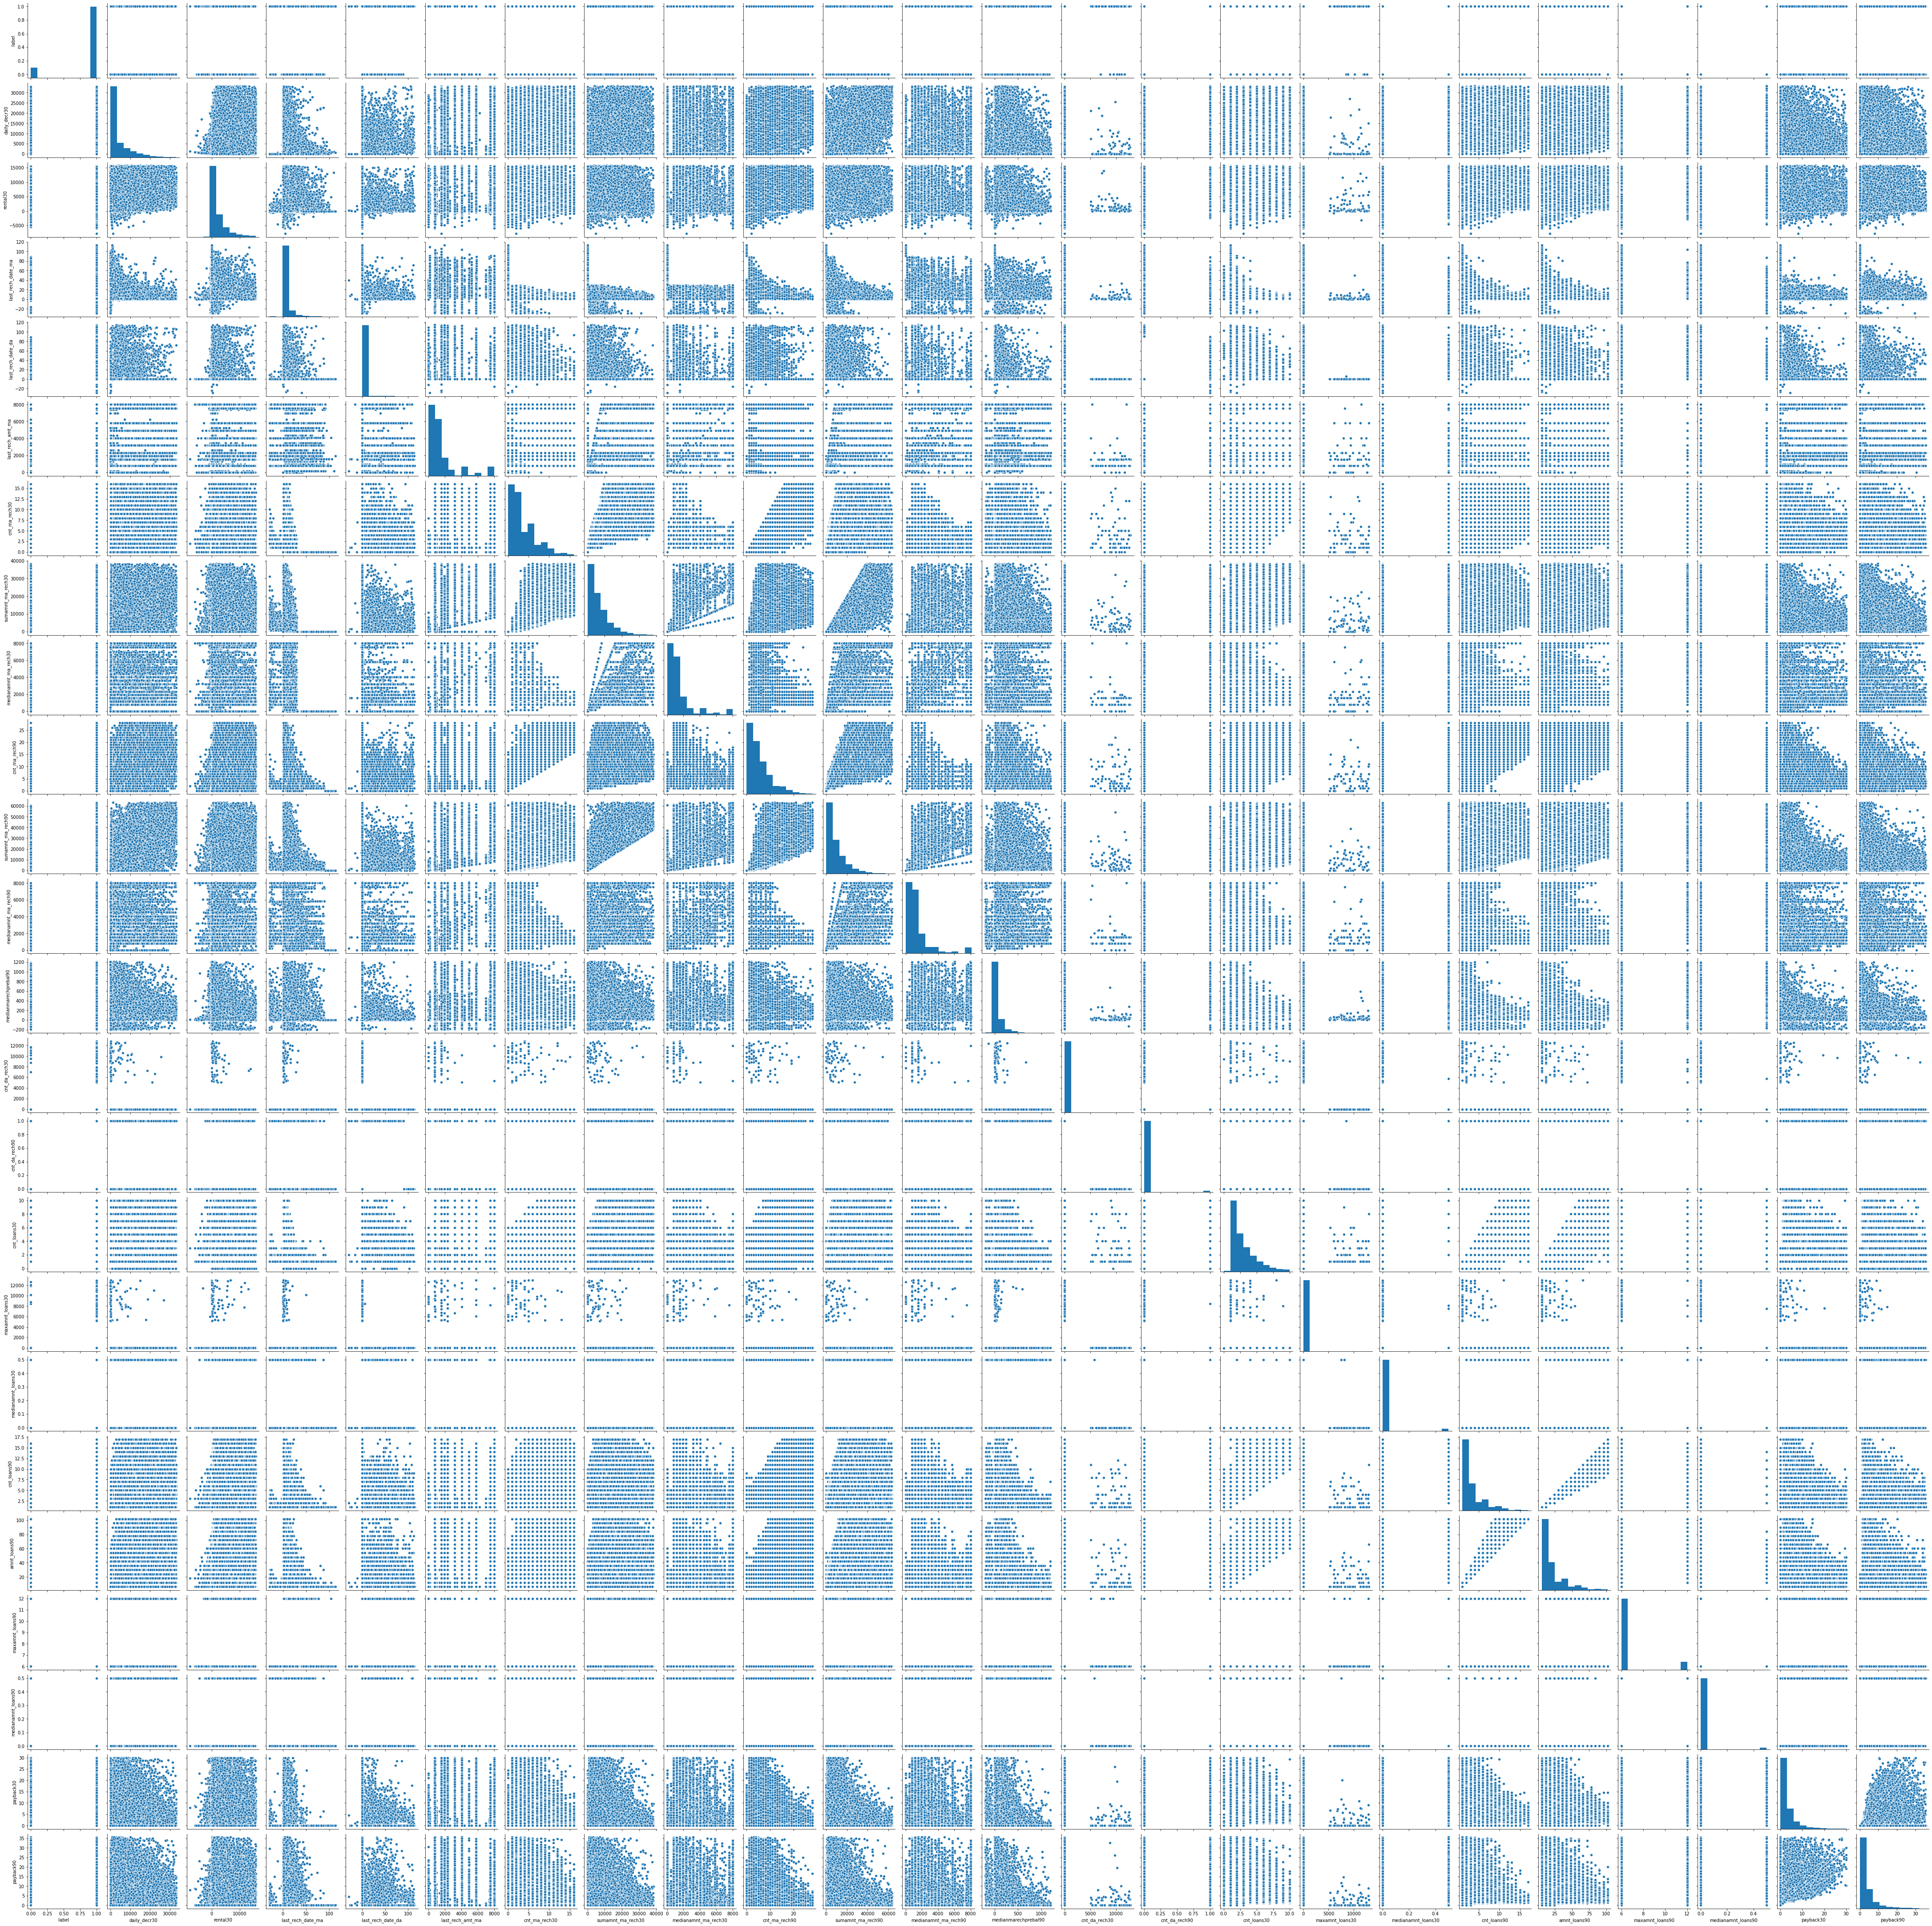

In [28]:
sns.pairplot(df)

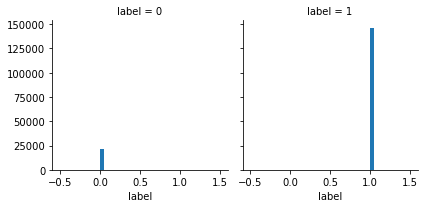

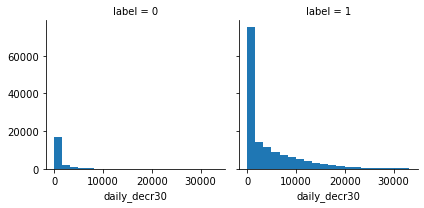

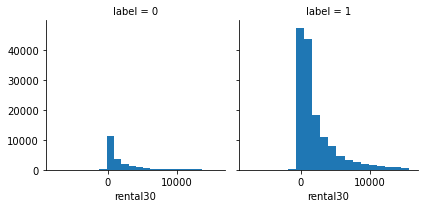

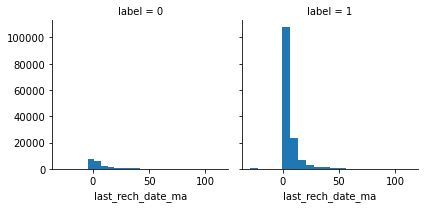

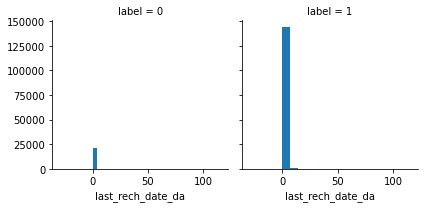

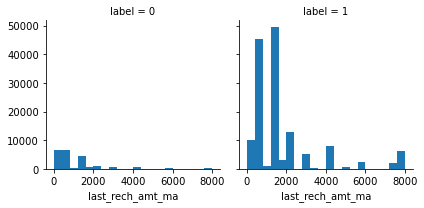

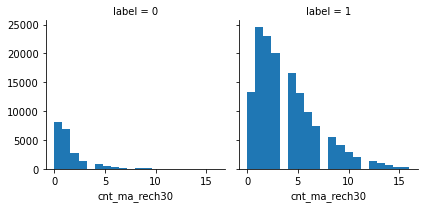

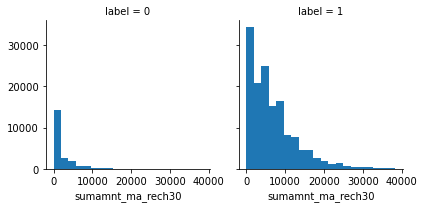

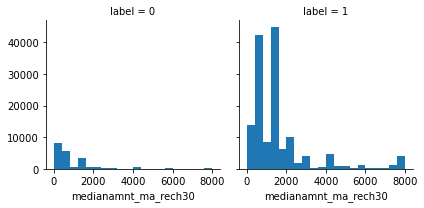

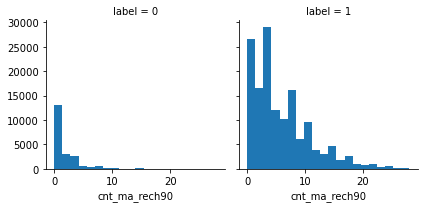

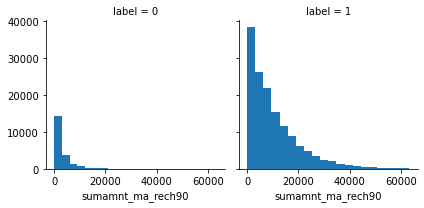

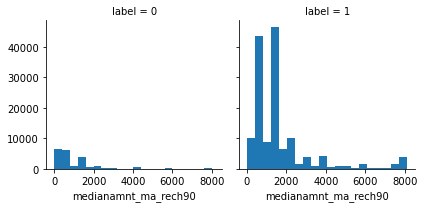

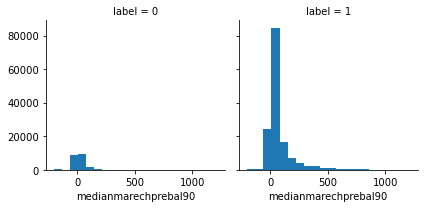

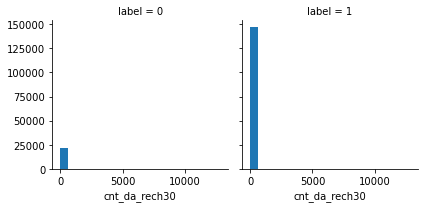

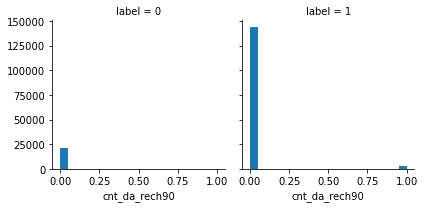

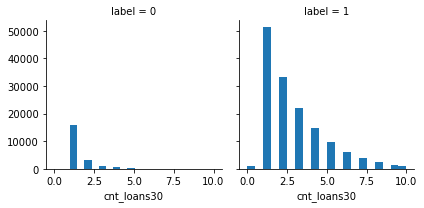

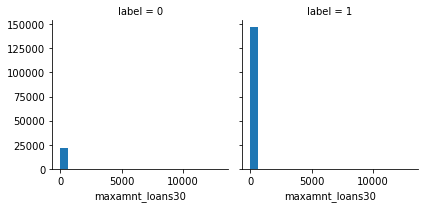

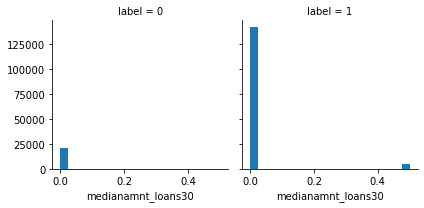

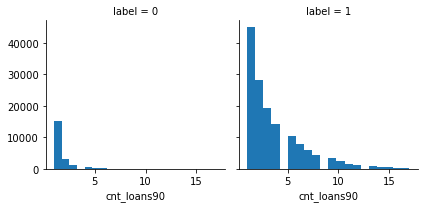

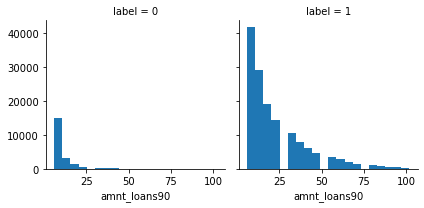

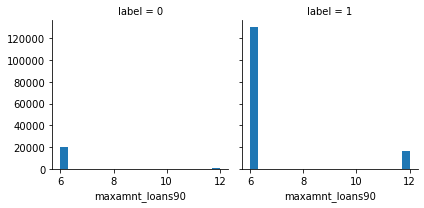

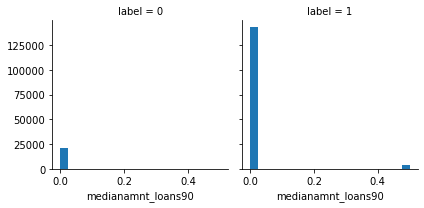

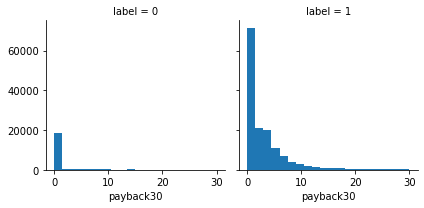

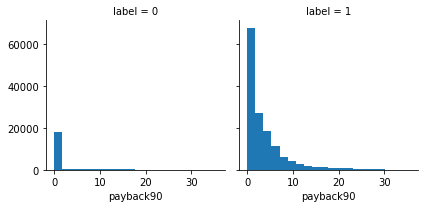

In [29]:
for i in df.columns:
    g = sns.FacetGrid(df, col='label')
    g.map(plt.hist, i, bins=20)

# Model preparations

In [30]:
#as target variable have only 2 values, yes or no we will try the logistic regression approach
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [31]:
x=df.iloc[:,1:]
y=df['label']
print(x.shape,y.shape)
#divide data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22,random_state=43)

(167851, 23) (167851,)


In [32]:
#training model and fitting the train data
#predicting on test data further and checking the metrics
lg = LogisticRegression(max_iter=10000)
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
#lets keep this model untouched

0.8764893847487002
[[  282  4357]
 [  204 32085]]
              precision    recall  f1-score   support

           0       0.58      0.06      0.11      4639
           1       0.88      0.99      0.93     32289

    accuracy                           0.88     36928
   macro avg       0.73      0.53      0.52     36928
weighted avg       0.84      0.88      0.83     36928



In [33]:
x1=df.iloc[:,1:]
y1=df['label']
print(x1.shape,y1.shape)

(167851, 23) (167851,)


In [34]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=43)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [36]:
rfc=RandomForestClassifier(criterion='entropy')
rfc.fit(x1_train,y1_train)
rfc_pred=rfc.predict(x1_test)
print(accuracy_score(y1_test,rfc_pred))
print(confusion_matrix(y1_test,rfc_pred))
print(classification_report(y1_test,rfc_pred))

0.9046522963604853
[[ 1858  2781]
 [  740 31549]]
              precision    recall  f1-score   support

           0       0.72      0.40      0.51      4639
           1       0.92      0.98      0.95     32289

    accuracy                           0.90     36928
   macro avg       0.82      0.69      0.73     36928
weighted avg       0.89      0.90      0.89     36928



In [37]:
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
rfc1_pred=rfc.predict(x1_test)
print(accuracy_score(y1_test,rfc1_pred))
print(confusion_matrix(y1_test,rfc1_pred))
print(classification_report(y1_test,rfc1_pred))

0.9043544194107452
[[ 1863  2776]
 [  756 31533]]
              precision    recall  f1-score   support

           0       0.71      0.40      0.51      4639
           1       0.92      0.98      0.95     32289

    accuracy                           0.90     36928
   macro avg       0.82      0.69      0.73     36928
weighted avg       0.89      0.90      0.89     36928



Random Forest Classifier accuracy increses and ability of model to predict zeroes accurately also increases

In [38]:
from sklearn import svm
svc=svm.SVC()
svc.fit(x1_train,y1_train)
svc_pred=rfc.predict(x1_test)
print(accuracy_score(y1_test,svc_pred))
print(confusion_matrix(y1_test,svc_pred))
print(classification_report(y1_test,svc_pred))

0.9043544194107452
[[ 1863  2776]
 [  756 31533]]
              precision    recall  f1-score   support

           0       0.71      0.40      0.51      4639
           1       0.92      0.98      0.95     32289

    accuracy                           0.90     36928
   macro avg       0.82      0.69      0.73     36928
weighted avg       0.89      0.90      0.89     36928



svc performs similar to rfc

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_score_lg=roc_auc_score(y1_test,pred)
auc_score_rfc=roc_auc_score(y1_test,rfc_pred)
auc_score_rfc1=roc_auc_score(y1_test,rfc1_pred)
print(auc_score_lg,auc_score_rfc,auc_score_rfc1)

0.5272355110220586 0.6887996656302531 0.6890908124820735


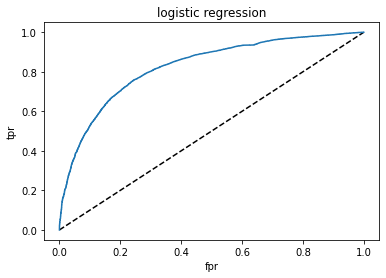

In [40]:
y_pred_prb = lg.predict_proba(x1_test)[:,1:]
fpr,tpr,thresholds=roc_curve(y1_test,y_pred_prb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('logistic regression')
plt.show()

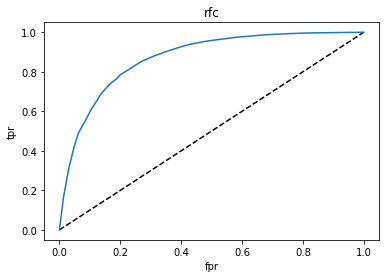

In [41]:
y1_pred_prb = rfc.predict_proba(x1_test)[:,1:]
fpr,tpr,thresholds=roc_curve(y1_test,y1_pred_prb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'rfc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('rfc')
plt.show()

In [42]:
#finalize and save the model
import joblib
joblib.dump(rfc,'microcredit.pkl')

['microcredit.pkl']